# Coursera: Data Analysis Tools – Assignment 3
This assignment required applying correlation coefficient test to explore relationship between two quantitative variables. As there were no such thing among my focus variables, I had to invent some substitute for testing.

First I tried to use two variables from the same dataset:
* Cannabis use (transformed to quantitative, see Assignment 1)
* Tobacco use (to be transformed)
Question was: is there any relationship between the amount of tobacco and cannabis use?  
I tried to convert them to quantitative variables and check the association.

After I failed (see below) I used another dataset (Gapminder) as a source of mock variables for this mock test.

In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from scipy import stats

NESARC = r"C:\Users\USER\Documents\Courses\Coursera\dai\datasets\nesarc\nesarc_pds.csv"

# Load data
data = pd.read_csv(NESARC, low_memory=False)

Process variable on cannabis use to make it quantitative and possibly non-discrete.

In [2]:
### Processing variable reflecting recent cannabis use

CANNABIS_USE_12M = 'S3BD5Q2C'  # 'HOW OFTEN USED CANNABIS IN THE LAST 12 MONTHS'

# Convert values to numeric
data[CANNABIS_USE_12M] = pd.to_numeric(data[CANNABIS_USE_12M], errors='coerce')

# Code reference for CANNABIS_USE_12M
CANNABIS_USE_CAT_MAP = {
    1: "Every day",
    2: "Nearly every day",
    3: "3 to 4 times a week",
    4: "1 to 2 times a week",
    5: "2 to 3 times a month",
    6: "Once a month",
    7: "7 to 11 times a year",
    8: "3 to 6 times a year",
    9: "2 times a year",
    10: "Once a year",
    99: "Unknown",
}
# Recode meaningful NaN (to 11, N/A) and 'Unknowns' (99 to NaN)
data[CANNABIS_USE_12M] = data[CANNABIS_USE_12M].replace(np.NaN, 11).replace(99, np.NaN)
# print(data[CANNABIS_USE_12M].value_counts(sort=False, dropna=False))

# Recode values so that they reflect approximately number of times of cannabis use per last year, store in new column

CANNABIS_USE_TIMES_MAP = {
    1: [365, 366],
    2: [330, 364],
    3: [156, 208],
    4: [52, 104],
    5: [24, 36],
    6: [12, 12],
    7: [7, 11],
    8: [3, 4],
    9: [2, 2],
    10: [1, 1],
    11: [0, 0]
}

def recode_values(row):
    raw = row[CANNABIS_USE_12M]
    value_range = CANNABIS_USE_TIMES_MAP.get(raw)
    if value_range:
        return np.random.randint(value_range[0], value_range[1] + 1)

CANNABIS_USE_QUANT = 'CANNABIS_USE_QUANT'

data[CANNABIS_USE_QUANT] = data.apply(lambda row: recode_values(row), axis=1)

# print(data[CANNABIS_USE_QUANT].value_counts(sort=False, dropna=False))

TOBACCO_12M = 'CHECK321'

cannabis_condition = data[CANNABIS_USE_QUANT] > 0
tobacco_condition = data[TOBACCO_12M] == 1
cannabis_tobacco_subset = data[cannabis_condition & tobacco_condition].copy()  # 986 observations

cannabis_tobacco_subset.describe()

,Unnamed: 0,ETHRACE2A,IDNUM,PSU,STRATUM,WEIGHT,CDAY,CMON,CYEAR,REGION,...,HAL12ABDEP,HALP12ABDEP,MAR12ABDEP,MARP12ABDEP,HER12ABDEP,HERP12ABDEP,OTHB12ABDEP,OTHBP12ABDEP,NDSymptoms,CANNABIS_USE_QUANT
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,...,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.0,986.000000,320.000000,986.000000
mean,22065.130832,1.864097,22066.130832,28469.777890,2843.781947,5402.113786,15.856998,8.690669,2001.121704,2.609533,...,0.043611,0.191684,0.570994,0.787018,0.008114,0.037525,0.0,0.014199,3.456250,126.361055
std,12271.654580,1.403328,12271.654580,15922.848422,1588.432032,3904.984385,8.841000,2.855692,0.327109,1.079890,...,0.249110,0.526237,0.883883,0.863985,0.142263,0.291350,0.0,0.168002,1.863179,148.979968
min,44.000000,1.000000,45.000000,1011.000000,101.000000,467.304244,1.000000,1.000000,2001.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
25%,12058.250000,1.000000,12059.250000,13057.000000,1303.750000,2867.656531,8.000000,8.000000,2001.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.000000,8.000000
50%,21932.000000,1.000000,21933.000000,29029.500000,2901.000000,4148.140240,16.000000,9.000000,2001.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,3.000000,33.500000
75%,32415.750000,2.000000,32416.750000,41097.000000,4105.750000,7343.481636,24.000000,10.000000,2001.000000,4.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,5.000000,336.000000
max,43090.000000,5.000000,43091.000000,56017.000000,5605.000000,37272.200480,31.000000,12.000000,2002.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.0,3.000000,7.000000,366.000000


Create quantitative variable based on tobacco use (using calculations from the course example).

In [3]:
# recoding values for S3AQ3B1 into a new variable, USFREQMO, showing smoking day rate per month
recode_map2 = {1: 30, 2: 22, 3: 14, 4: 5, 5: 2.5, 6: 1}

CIG_FREQUENCY = 'S3AQ3B1'  # USUAL FREQUENCY WHEN SMOKED CIGARETTES
CIG_FREQUENCY_MONTH = 'CIG_FREQUENCY_MONTH'
CIG_NUM_DAY = 'CIG_NUM_DAY'
CIG_NUM_YEAR = 'CIG_NUM_YEAR'
CIG_QUANTITY = 'S3AQ3C1'  # USUAL QUANTITY WHEN SMOKED CIGARETTES

cannabis_tobacco_subset2 = cannabis_tobacco_subset.copy()

cannabis_tobacco_subset2[CIG_FREQUENCY_MONTH] = cannabis_tobacco_subset2[CIG_FREQUENCY].map(recode_map2)

# secondary variable multiplying the number of days smoked/month and the approx number of cig smoked/day
cannabis_tobacco_subset2[CIG_NUM_DAY] = cannabis_tobacco_subset2[CIG_FREQUENCY_MONTH] * cannabis_tobacco_subset2[CIG_QUANTITY]
cannabis_tobacco_subset2[CIG_NUM_DAY] = pd.to_numeric(cannabis_tobacco_subset2[CIG_NUM_DAY], errors='coerce')
cannabis_tobacco_subset2[CANNABIS_USE_QUANT] = pd.to_numeric(cannabis_tobacco_subset2[CANNABIS_USE_QUANT], errors='coerce')


Visualize with a scatterplot.

Text(0.5, 1.0, 'Scatterplot for the Association Between Tobacco and Cannabis Use')

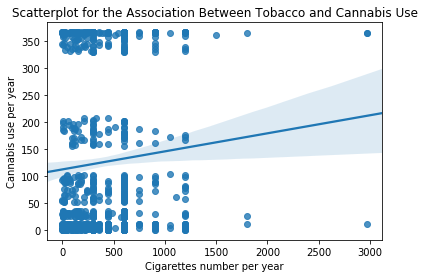

In [4]:
scatplot = seaborn.regplot(x=CIG_NUM_DAY, y=CANNABIS_USE_QUANT, fit_reg=True, data=cannabis_tobacco_subset2)
plt.xlabel('Cigarettes number per year')
plt.ylabel('Cannabis use per year')
plt.title('Scatterplot for the Association Between Tobacco and Cannabis Use')

Looks like scatterplot is still not quite appropriate to show the associasion between these quasi-continuous values.

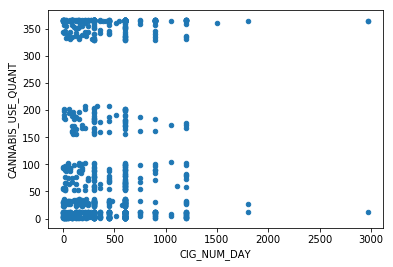

In [5]:
cannabis_tobacco_subset2.plot.scatter(CIG_NUM_DAY, CANNABIS_USE_QUANT)  # Yet another way to create this useless scatterplot

In [8]:
r_value, p_value = stats.pearsonr(cannabis_tobacco_subset2[CIG_NUM_DAY], cannabis_tobacco_subset2[CANNABIS_USE_QUANT])
print('r: {}\np-value: {}'.format(r_value, p_value))

r: 0.07723245742484375
p-value: 0.01527906573831201


So, if it is even linear (which I am not exactly sure about), the association between cannabis and topbacco use is very weak, close to zero.

Next attempt to have a look at Q -> Q behaviour just for the sake of it is another dataset.

Text(0.5, 1.0, 'Scatterplot for the Association Between Internet Use Rate and Life Expectancy')

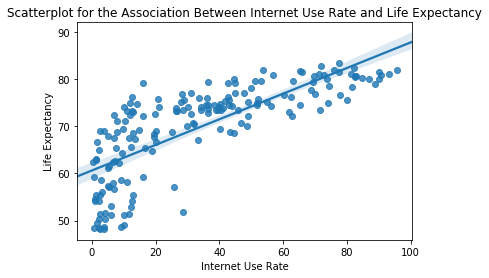

In [24]:
GAPMINDER = r"C:\Users\USER\Documents\Courses\Coursera\dai\datasets\gapminder\gapminder.csv"

# Load data
data_gapminder = pd.read_csv(GAPMINDER, low_memory=False)
data_gapminder['lifeexpectancy'] = pd.to_numeric(data_gapminder['lifeexpectancy'], errors='coerce')
data_gapminder['internetuserate'] = pd.to_numeric(data_gapminder['internetuserate'], errors='coerce')
no_na = data_gapminder[['lifeexpectancy', 'internetuserate']].dropna()
scatplot_gapminder = seaborn.regplot(x='internetuserate', y='lifeexpectancy', fit_reg=True, data=no_na)
plt.xlabel('Internet Use Rate')
plt.ylabel('Life Expectancy')
plt.title('Scatterplot for the Association Between Internet Use Rate and Life Expectancy')

Well, this one at long last produced a realistic scatterplot with a quite predictable result. And now for the correlation coefficient test:

In [25]:
no_na.describe()

,lifeexpectancy,internetuserate
count,179.000000,179.000000
mean,69.770000,33.779510
std,9.649001,27.182508
min,48.132000,0.210066
25%,64.447000,9.724985
50%,73.131000,29.879921
75%,76.337000,51.936111
max,83.394000,95.638113


In [26]:
r_value, p_value = stats.pearsonr(no_na['internetuserate'], no_na['lifeexpectancy'])
print('r: {}\np-value: {}'.format(r_value, p_value))

r: 0.7639195050322616
p-value: 1.6663559690408397e-35


So, the test shows a rather strong positive relationship between internet use rate and life expectancy, which is accompanied by a very low p-value. So there, the we more one surfs the internet, the longer they live.